**Let's take a look at a portion of the ATP tennis dataset on Kaggle to see which players have won the most grand slam tournaments between 2000 and 2020.**

In [1]:
# Import libraries used in this project and change the max display to show all columns when previewing the dataframes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib.colors as mcolors
pd.set_option('display.max_columns', None)

In [2]:
# Import csv files - one for each year of APT matches from 2000 through 2020

atp_00 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2000.csv")
atp_01 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2001.csv")
atp_02 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2002.csv")
atp_03 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2003.csv")
atp_04 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2004.csv")
atp_05 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2005.csv")
atp_06 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2006.csv")
atp_07 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2007.csv")
atp_08 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2008.csv")
atp_09 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2009.csv")
atp_10 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2010.csv")
atp_11 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2011.csv")
atp_12 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2012.csv")
atp_13 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2013.csv")
atp_14 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2014.csv")
atp_15 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2015.csv")
atp_16 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2016.csv")
atp_17 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2017.csv")
atp_18 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2018.csv")
atp_19 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2019.csv")
atp_20 = pd.read_csv(r"/kaggle/input/tennis/tennis_atp/atp_matches_2020.csv")

In [3]:
# Set the option to show all columns when previewing dataframes instead of truncating them

pd.set_option('display.max_columns', None)

In [4]:
# The datasets for each year have the same fields, so we will combine them into one dataframe

atp_combined = pd.concat([atp_00, atp_01, atp_02, atp_03, atp_04, atp_05, atp_06,
                       atp_07, atp_08, atp_09, atp_10, atp_11, atp_12, atp_13,
                       atp_14, atp_15, atp_16, atp_17, atp_18, atp_19, atp_20])

In [5]:
# Filter dataframe down to only the grand slam tournaments by using the 'tourney_name' field

grand_slams = ["Roland Garros", "Wimbledon", "Australian Open", "US Open"] # the names of the 4 grand slam tournaments
atp_slams = atp_combined[atp_combined["tourney_name"].isin(grand_slams)].copy()

In [6]:
# Replace any infinite or negative infinite values with nan and replace null values with 0 to prevent warning messages

atp_slams.replace([np.inf, -np.inf], np.nan, inplace=True)
atp_slams.fillna(0, inplace=True)
atp_slams.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
2130,2000-520,Roland Garros,Clay,128,G,20000529,1,101736,1.0,0,Andre Agassi,R,180.0,USA,30.0,102179,0.0,WC,Antony Dupuis,R,185.0,FRA,27.2,7-6(7) 6-3 6-4,5,R128,132.0,8.0,3.0,99.0,67.0,49.0,19.0,15.0,2.0,4.0,9.0,6.0,100.0,52.0,38.0,22.0,16.0,9.0,13.0,1.0,5085.0,116.0,355.0
2131,2000-520,Roland Garros,Clay,128,G,20000529,2,102344,0.0,0,Karol Kucera,R,188.0,SVK,26.2,103202,0.0,Q,Oscar Serrano,R,173.0,ESP,22.0,6-1 6-2 6-1,5,R128,75.0,11.0,4.0,63.0,38.0,27.0,13.0,11.0,4.0,6.0,0.0,1.0,66.0,50.0,13.0,9.0,11.0,14.0,23.0,40.0,845.0,219.0,158.0
2132,2000-520,Roland Garros,Clay,128,G,20000529,3,103181,0.0,0,Jiri Vanek,R,185.0,CZE,22.0,102238,0.0,0,Alberto Berasategui,R,173.0,ESP,26.9,6-1 6-1 6-7(5) 5-7 6-1,5,R128,187.0,9.0,5.0,162.0,94.0,66.0,34.0,22.0,7.0,13.0,1.0,8.0,175.0,120.0,65.0,15.0,23.0,12.0,25.0,88.0,463.0,83.0,494.0
2133,2000-520,Roland Garros,Clay,128,G,20000529,4,102644,0.0,0,Franco Squillari,L,183.0,ARG,24.7,102880,0.0,0,Alexander Popp,R,201.0,GER,23.5,3-6 6-3 6-2 6-0,5,R128,117.0,2.0,4.0,100.0,56.0,37.0,25.0,16.0,4.0,7.0,2.0,4.0,86.0,50.0,27.0,17.0,16.0,9.0,17.0,45.0,802.0,110.0,376.0
2134,2000-520,Roland Garros,Clay,128,G,20000529,5,103454,0.0,0,Nicolas Massu,R,183.0,CHI,20.6,102831,0.0,Q,Jacobo Diaz,R,173.0,ESP,23.8,6-4 6-3 6-3,5,R128,130.0,5.0,1.0,89.0,45.0,30.0,23.0,14.0,6.0,9.0,2.0,5.0,89.0,60.0,36.0,10.0,14.0,5.0,12.0,75.0,579.0,130.0,310.0


In [7]:
# Add a column combining the tourney_id and tourney_name columns into one string for grouping purposes

atp_slams['tourney_id_name'] = atp_slams['tourney_id'] + " " + atp_slams['tourney_name']
atp_slams.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_id_name
2130,2000-520,Roland Garros,Clay,128,G,20000529,1,101736,1.0,0,Andre Agassi,R,180.0,USA,30.0,102179,0.0,WC,Antony Dupuis,R,185.0,FRA,27.2,7-6(7) 6-3 6-4,5,R128,132.0,8.0,3.0,99.0,67.0,49.0,19.0,15.0,2.0,4.0,9.0,6.0,100.0,52.0,38.0,22.0,16.0,9.0,13.0,1.0,5085.0,116.0,355.0,2000-520 Roland Garros
2131,2000-520,Roland Garros,Clay,128,G,20000529,2,102344,0.0,0,Karol Kucera,R,188.0,SVK,26.2,103202,0.0,Q,Oscar Serrano,R,173.0,ESP,22.0,6-1 6-2 6-1,5,R128,75.0,11.0,4.0,63.0,38.0,27.0,13.0,11.0,4.0,6.0,0.0,1.0,66.0,50.0,13.0,9.0,11.0,14.0,23.0,40.0,845.0,219.0,158.0,2000-520 Roland Garros
2132,2000-520,Roland Garros,Clay,128,G,20000529,3,103181,0.0,0,Jiri Vanek,R,185.0,CZE,22.0,102238,0.0,0,Alberto Berasategui,R,173.0,ESP,26.9,6-1 6-1 6-7(5) 5-7 6-1,5,R128,187.0,9.0,5.0,162.0,94.0,66.0,34.0,22.0,7.0,13.0,1.0,8.0,175.0,120.0,65.0,15.0,23.0,12.0,25.0,88.0,463.0,83.0,494.0,2000-520 Roland Garros
2133,2000-520,Roland Garros,Clay,128,G,20000529,4,102644,0.0,0,Franco Squillari,L,183.0,ARG,24.7,102880,0.0,0,Alexander Popp,R,201.0,GER,23.5,3-6 6-3 6-2 6-0,5,R128,117.0,2.0,4.0,100.0,56.0,37.0,25.0,16.0,4.0,7.0,2.0,4.0,86.0,50.0,27.0,17.0,16.0,9.0,17.0,45.0,802.0,110.0,376.0,2000-520 Roland Garros
2134,2000-520,Roland Garros,Clay,128,G,20000529,5,103454,0.0,0,Nicolas Massu,R,183.0,CHI,20.6,102831,0.0,Q,Jacobo Diaz,R,173.0,ESP,23.8,6-4 6-3 6-3,5,R128,130.0,5.0,1.0,89.0,45.0,30.0,23.0,14.0,6.0,9.0,2.0,5.0,89.0,60.0,36.0,10.0,14.0,5.0,12.0,75.0,579.0,130.0,310.0,2000-520 Roland Garros


In [8]:
# Move the newly created 'tourney_id_name' column to the front of the dataframe

atp_slams = atp_slams[['tourney_id_name'] + [col for col in atp_slams.columns if col != 'tourney_id_name']]
atp_slams.head()

,tourney_id_name,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
2130,2000-520 Roland Garros,2000-520,Roland Garros,Clay,128,G,20000529,1,101736,1.0,0,Andre Agassi,R,180.0,USA,30.0,102179,0.0,WC,Antony Dupuis,R,185.0,FRA,27.2,7-6(7) 6-3 6-4,5,R128,132.0,8.0,3.0,99.0,67.0,49.0,19.0,15.0,2.0,4.0,9.0,6.0,100.0,52.0,38.0,22.0,16.0,9.0,13.0,1.0,5085.0,116.0,355.0
2131,2000-520 Roland Garros,2000-520,Roland Garros,Clay,128,G,20000529,2,102344,0.0,0,Karol Kucera,R,188.0,SVK,26.2,103202,0.0,Q,Oscar Serrano,R,173.0,ESP,22.0,6-1 6-2 6-1,5,R128,75.0,11.0,4.0,63.0,38.0,27.0,13.0,11.0,4.0,6.0,0.0,1.0,66.0,50.0,13.0,9.0,11.0,14.0,23.0,40.0,845.0,219.0,158.0
2132,2000-520 Roland Garros,2000-520,Roland Garros,Clay,128,G,20000529,3,103181,0.0,0,Jiri Vanek,R,185.0,CZE,22.0,102238,0.0,0,Alberto Berasategui,R,173.0,ESP,26.9,6-1 6-1 6-7(5) 5-7 6-1,5,R128,187.0,9.0,5.0,162.0,94.0,66.0,34.0,22.0,7.0,13.0,1.0,8.0,175.0,120.0,65.0,15.0,23.0,12.0,25.0,88.0,463.0,83.0,494.0
2133,2000-520 Roland Garros,2000-520,Roland Garros,Clay,128,G,20000529,4,102644,0.0,0,Franco Squillari,L,183.0,ARG,24.7,102880,0.0,0,Alexander Popp,R,201.0,GER,23.5,3-6 6-3 6-2 6-0,5,R128,117.0,2.0,4.0,100.0,56.0,37.0,25.0,16.0,4.0,7.0,2.0,4.0,86.0,50.0,27.0,17.0,16.0,9.0,17.0,45.0,802.0,110.0,376.0
2134,2000-520 Roland Garros,2000-520,Roland Garros,Clay,128,G,20000529,5,103454,0.0,0,Nicolas Massu,R,183.0,CHI,20.6,102831,0.0,Q,Jacobo Diaz,R,173.0,ESP,23.8,6-4 6-3 6-3,5,R128,130.0,5.0,1.0,89.0,45.0,30.0,23.0,14.0,6.0,9.0,2.0,5.0,89.0,60.0,36.0,10.0,14.0,5.0,12.0,75.0,579.0,130.0,310.0


In [9]:
# Group the dataframe by tourney_id_name and counting the winner_id. A player has to win 7 matches to win the tournament.
# The logic here is we can find the player who had 7 wins for each unique tourney_id_name to determine the champion of the tournament.

win_counts = atp_slams.groupby(['tourney_id_name', 'tourney_name', 'winner_name', 'winner_id'])['winner_id'].count()

In [10]:
# Sort the grouped data to make sure there are players with 7 wins at the top.

win_counts = win_counts.sort_values(ascending=False)
win_counts

tourney_id_name           tourney_name     winner_name         winner_id
2011-520 Roland Garros    Roland Garros    Rafael Nadal        104745       7
2011-540 Wimbledon        Wimbledon        Novak Djokovic      104925       7
2005-560 US Open          US Open          Roger Federer       103819       7
2002-560 US Open          US Open          Pete Sampras        101948       7
2014-520 Roland Garros    Roland Garros    Rafael Nadal        104745       7
                                                                           ..
2012-560 US Open          US Open          Nikolay Davydenko   103786       1
                                           Pablo Andujar       104665       1
                                           Paul Henri Mathieu  103908       1
2005-520 Roland Garros    Roland Garros    Robin Vik           103503       1
2020-580 Australian Open  Australian Open  Yuichi Sugita       105216       1
Name: winner_id, Length: 5248, dtype: int64

In [11]:
# Convert the grouped data back into a dataframe

win_counts_df = win_counts.reset_index(name='win_count')
win_counts_df.head()

,tourney_id_name,tourney_name,winner_name,winner_id,win_count
0,2011-520 Roland Garros,Roland Garros,Rafael Nadal,104745,7
1,2011-540 Wimbledon,Wimbledon,Novak Djokovic,104925,7
2,2005-560 US Open,US Open,Roger Federer,103819,7
3,2002-560 US Open,US Open,Pete Sampras,101948,7
4,2014-520 Roland Garros,Roland Garros,Rafael Nadal,104745,7


In [12]:
# Filter the dataframe to show only players with a win_count of 7 (ie. the tournament champion)

win_counts_df = win_counts_df[win_counts_df['win_count'] == 7]
win_counts_df.head()

,tourney_id_name,tourney_name,winner_name,winner_id,win_count
0,2011-520 Roland Garros,Roland Garros,Rafael Nadal,104745,7
1,2011-540 Wimbledon,Wimbledon,Novak Djokovic,104925,7
2,2005-560 US Open,US Open,Roger Federer,103819,7
3,2002-560 US Open,US Open,Pete Sampras,101948,7
4,2014-520 Roland Garros,Roland Garros,Rafael Nadal,104745,7


In [13]:
# Ensuring that the only value in the win_count field is 7

win_counts_df.groupby(['win_count'])['win_count'].count()

win_count
7    82
Name: win_count, dtype: int64

In [14]:
# Drop the win_count field from the dataframe since it is no longer needed

win_counts_df = win_counts_df.drop('win_count', axis=1)
win_counts_df.head()

,tourney_id_name,tourney_name,winner_name,winner_id
0,2011-520 Roland Garros,Roland Garros,Rafael Nadal,104745
1,2011-540 Wimbledon,Wimbledon,Novak Djokovic,104925
2,2005-560 US Open,US Open,Roger Federer,103819
3,2002-560 US Open,US Open,Pete Sampras,101948
4,2014-520 Roland Garros,Roland Garros,Rafael Nadal,104745


In [15]:
# To avoid duplicate values, the data will be grouped the using winner_id value instead of the winner_name value
# To later replace the winner_id values with player names for readability, a mapping dictionary between winner_id and winner_name will be created

player_mapping = win_counts_df.drop_duplicates(subset='winner_id').set_index('winner_id')['winner_name'].to_dict()
player_mapping

{104745: 'Rafael Nadal',
 104925: 'Novak Djokovic',
 103819: 'Roger Federer',
 101948: 'Pete Sampras',
 102856: 'Gustavo Kuerten',
 101736: 'Andre Agassi',
 105223: 'Juan Martin del Potro',
 101964: 'Goran Ivanisevic',
 103720: 'Lleyton Hewitt',
 104527: 'Stan Wawrinka',
 104918: 'Andy Murray',
 103498: 'Marat Safin',
 105227: 'Marin Cilic',
 103507: 'Juan Carlos Ferrero',
 102563: 'Thomas Johansson',
 103292: 'Gaston Gaudio',
 104053: 'Andy Roddick',
 102610: 'Albert Costa'}

**Now we will create a bar chart showing the number of grand slam tournament titles by player between 2000 and 2020**

In [16]:
# Group the win_counts_df dataframe to get the number of grand slam titles by winner_id

slam_wins_by_id = win_counts_df.groupby(['winner_id']).size()
slam_wins_by_id

winner_id
101736     3
101948     2
101964     1
102563     1
102610     1
102856     2
103292     1
103498     2
103507     1
103720     2
103819    20
104053     1
104527     3
104745    20
104918     3
104925    17
105223     1
105227     1
dtype: int64

In [17]:
# Use the mapping created earlier to replace winner_id with winner_name for readability in the bar chart

slam_wins_df = slam_wins_by_id.rename(index=player_mapping)
slam_wins_df.head()

winner_id
Andre Agassi        3
Pete Sampras        2
Goran Ivanisevic    1
Thomas Johansson    1
Albert Costa        1
dtype: int64

In [18]:
# Sort the grouped data above in descending order to prepare for making the bar chart

slam_wins_df = slam_wins_df.sort_values(ascending=False)
slam_wins_df

winner_id
Rafael Nadal             20
Roger Federer            20
Novak Djokovic           17
Andre Agassi              3
Andy Murray               3
Stan Wawrinka             3
Pete Sampras              2
Lleyton Hewitt            2
Marat Safin               2
Gustavo Kuerten           2
Juan Carlos Ferrero       1
Gaston Gaudio             1
Andy Roddick              1
Albert Costa              1
Thomas Johansson          1
Goran Ivanisevic          1
Juan Martin del Potro     1
Marin Cilic               1
dtype: int64

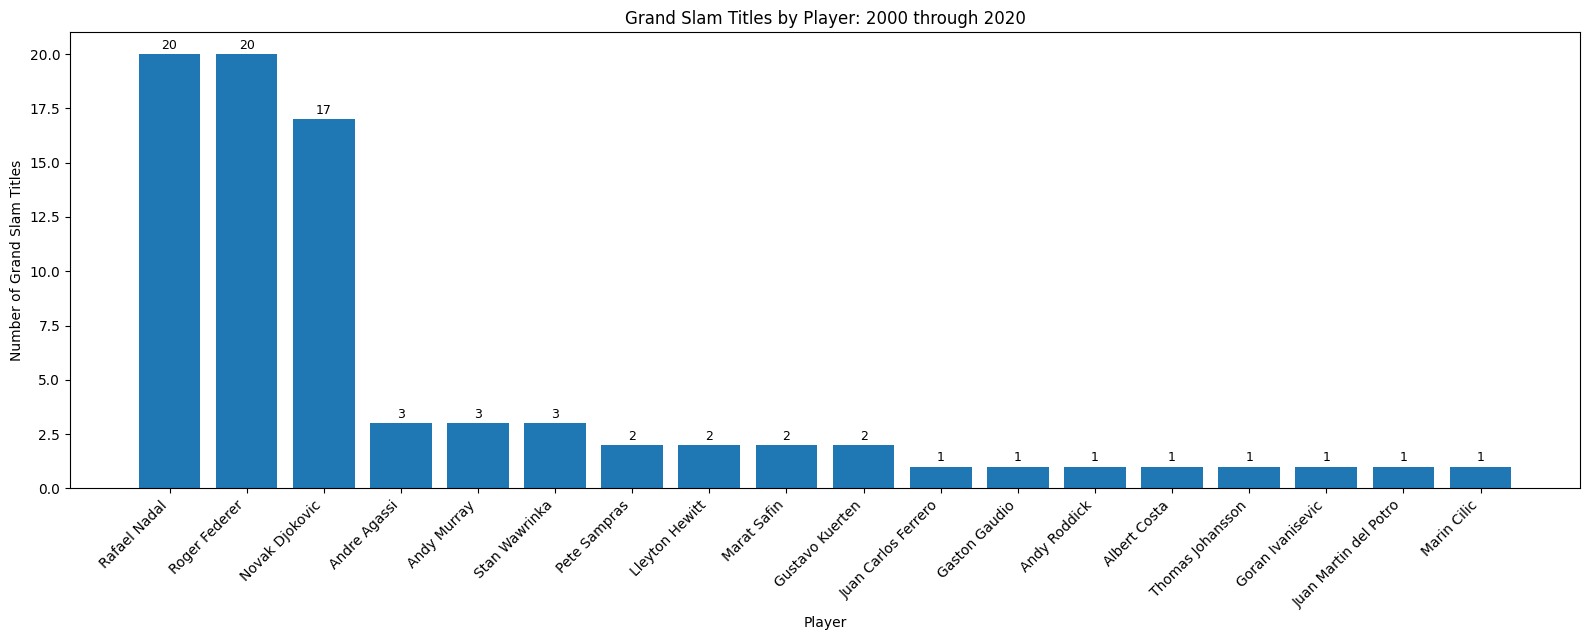

In [19]:
# Create the bar chart

plt.figure(figsize=(16, 6.5))
bars = plt.bar(slam_wins_df.index, slam_wins_df.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.1,
        int(yval),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Grand Slam Titles by Player: 2000 through 2020')
plt.xlabel('Player')
plt.ylabel('Number of Grand Slam Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

**Looking at the bart chart we can see that 3 players dominated grand slam tournaments over this 20-year period. Of the 82 total grand slam tournaments, 3 players won 57 of them, which is almost 70%! Let's next take a look at the number of wins those 3 dominant players had at each individual tournament.**

In [20]:
# Create dataframes based on win_counts_df for each tournament separately

roland_garros = win_counts_df[win_counts_df['tourney_name'] == 'Roland Garros']
wimbledon = win_counts_df[win_counts_df['tourney_name'] == 'Wimbledon']
us_open = win_counts_df[win_counts_df['tourney_name'] == 'US Open']
aus_open = win_counts_df[win_counts_df['tourney_name'] == 'Australian Open']

In [21]:
# Group data to prepare for making a bar chart for title wins by players at the Roland Garros tournament

rg_wins_by_id = roland_garros.groupby(['winner_id']).size()
rg_wins_by_id

winner_id
102610     1
102856     2
103292     1
103507     1
103819     1
104527     1
104745    13
104925     1
dtype: int64

In [22]:
# Apply the mapping from earlier to replace winner_id with names for readability

rg_wins_df = rg_wins_by_id.rename(index=player_mapping)
rg_wins_df

winner_id
Albert Costa            1
Gustavo Kuerten         2
Gaston Gaudio           1
Juan Carlos Ferrero     1
Roger Federer           1
Stan Wawrinka           1
Rafael Nadal           13
Novak Djokovic          1
dtype: int64

In [23]:
# Sort the grouped data in the rg_wins_df dataframe in descending order to prepare for bar chart

rg_wins_df = rg_wins_df.sort_values(ascending=False)
rg_wins_df

winner_id
Rafael Nadal           13
Gustavo Kuerten         2
Albert Costa            1
Gaston Gaudio           1
Juan Carlos Ferrero     1
Roger Federer           1
Stan Wawrinka           1
Novak Djokovic          1
dtype: int64

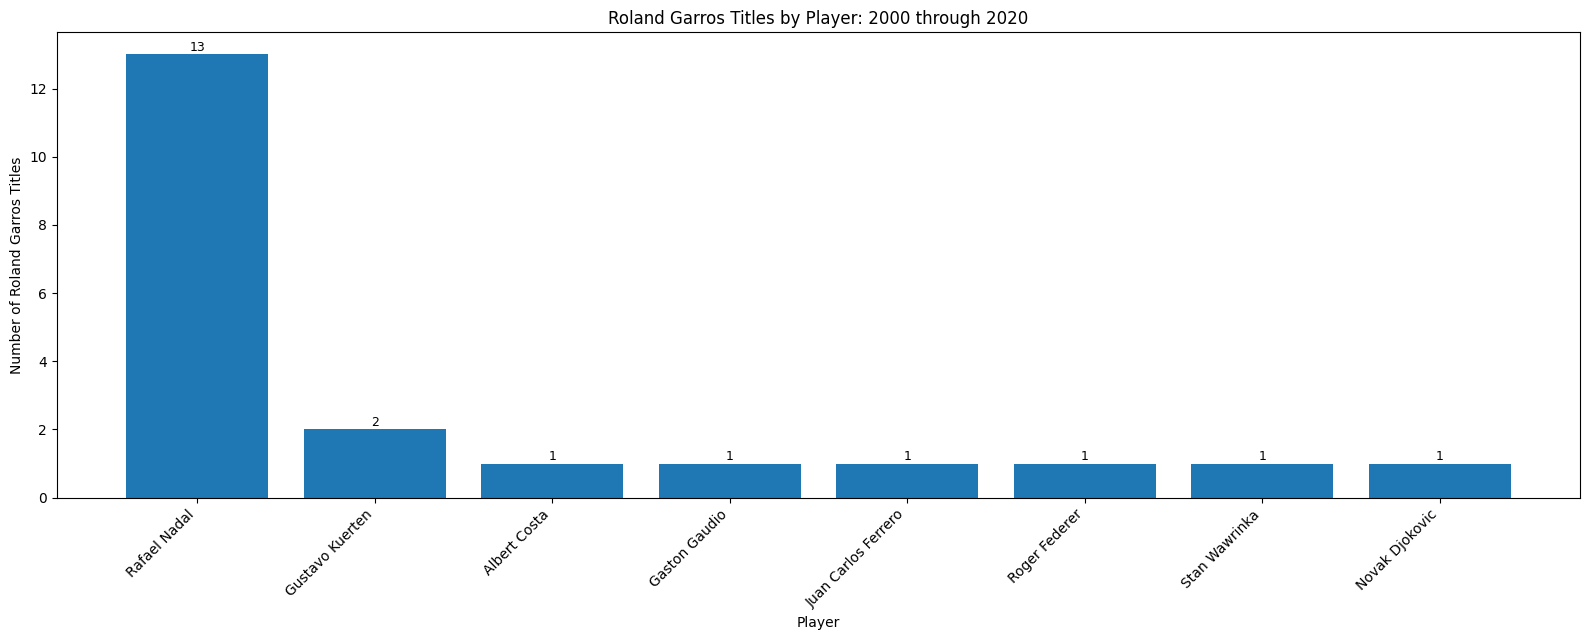

In [24]:
# Plot the bar chart for Roland Garros titles by player

plt.figure(figsize=(16, 6.5))
bars = plt.bar(rg_wins_df.index, rg_wins_df.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.02,
        int(yval),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Roland Garros Titles by Player: 2000 through 2020')
plt.xlabel('Player')
plt.ylabel('Number of Roland Garros Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [25]:
# Group data to prepare for making a bar chart for title wins by players at the Wimbledon tournament

wimb_wins_by_id = wimbledon.groupby(['winner_id']).size()
wimb_wins_by_id

winner_id
101948    1
101964    1
103720    1
103819    8
104745    2
104918    2
104925    5
dtype: int64

In [26]:
# Apply the mapping from earlier to replace winner_id with names for readability

wimb_wins_df = wimb_wins_by_id.rename(index=player_mapping)
wimb_wins_df

winner_id
Pete Sampras        1
Goran Ivanisevic    1
Lleyton Hewitt      1
Roger Federer       8
Rafael Nadal        2
Andy Murray         2
Novak Djokovic      5
dtype: int64

In [27]:
# Sort the grouped data in the rg_wins_df dataframe in descending order to prepare for bar chart

wimb_wins_df = wimb_wins_df.sort_values(ascending=False)
wimb_wins_df

winner_id
Roger Federer       8
Novak Djokovic      5
Rafael Nadal        2
Andy Murray         2
Pete Sampras        1
Goran Ivanisevic    1
Lleyton Hewitt      1
dtype: int64

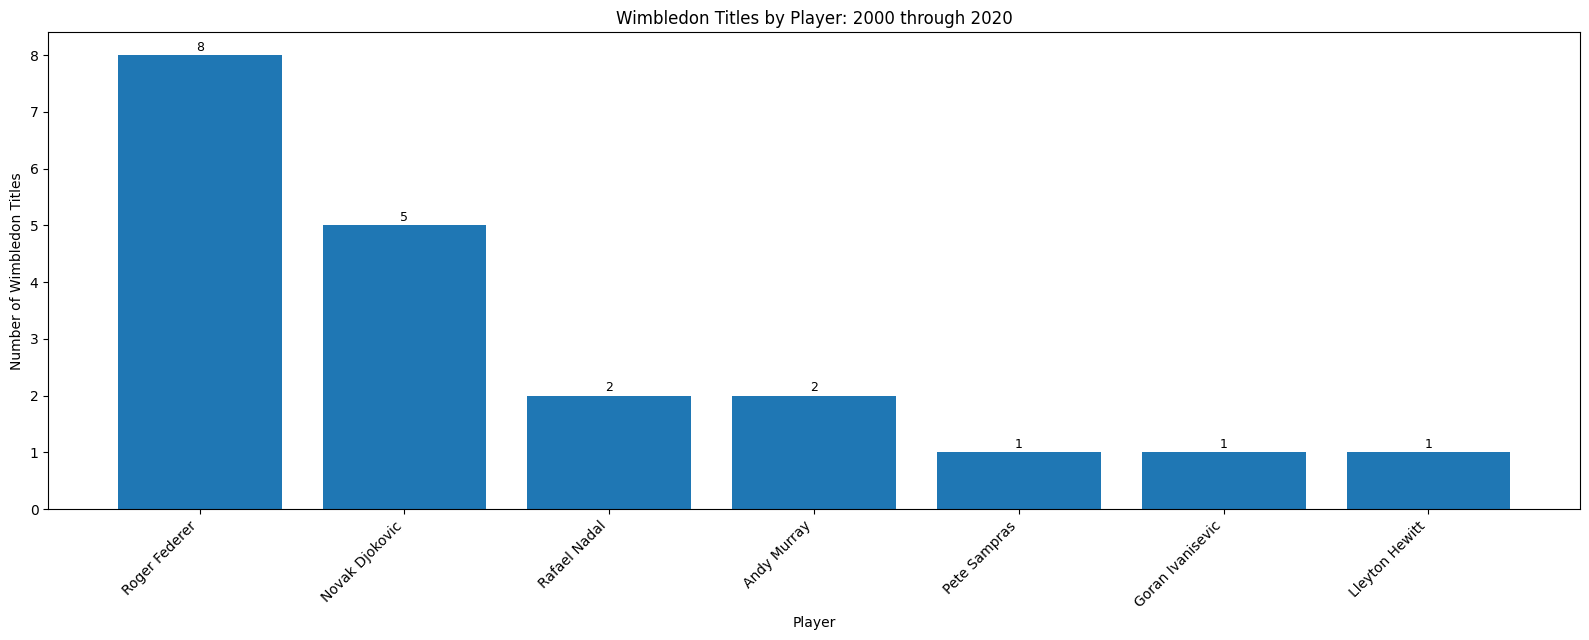

In [28]:
# Plot the bar chart for Wimbledon titles by player

plt.figure(figsize=(16, 6.5))
bars = plt.bar(wimb_wins_df.index, wimb_wins_df.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.02,
        int(yval),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Wimbledon Titles by Player: 2000 through 2020')
plt.xlabel('Player')
plt.ylabel('Number of Wimbledon Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [29]:
# Group data to prepare for making a bar chart for title wins by players at the US Open tournament

uso_wins_by_id = us_open.groupby(['winner_id']).size()
uso_wins_by_id

winner_id
101948    1
103498    1
103720    1
103819    5
104053    1
104527    1
104745    4
104918    1
104925    3
105223    1
105227    1
dtype: int64

In [30]:
# Apply the mapping from earlier to replace winner_id with names for readability

uso_wins_df = uso_wins_by_id.rename(index=player_mapping)
uso_wins_df

winner_id
Pete Sampras             1
Marat Safin              1
Lleyton Hewitt           1
Roger Federer            5
Andy Roddick             1
Stan Wawrinka            1
Rafael Nadal             4
Andy Murray              1
Novak Djokovic           3
Juan Martin del Potro    1
Marin Cilic              1
dtype: int64

In [31]:
# Sort the grouped data in the rg_wins_df dataframe in descending order to prepare for bar chart

uso_wins_df = uso_wins_df.sort_values(ascending=False)
uso_wins_df

winner_id
Roger Federer            5
Rafael Nadal             4
Novak Djokovic           3
Pete Sampras             1
Marat Safin              1
Lleyton Hewitt           1
Andy Roddick             1
Stan Wawrinka            1
Andy Murray              1
Juan Martin del Potro    1
Marin Cilic              1
dtype: int64

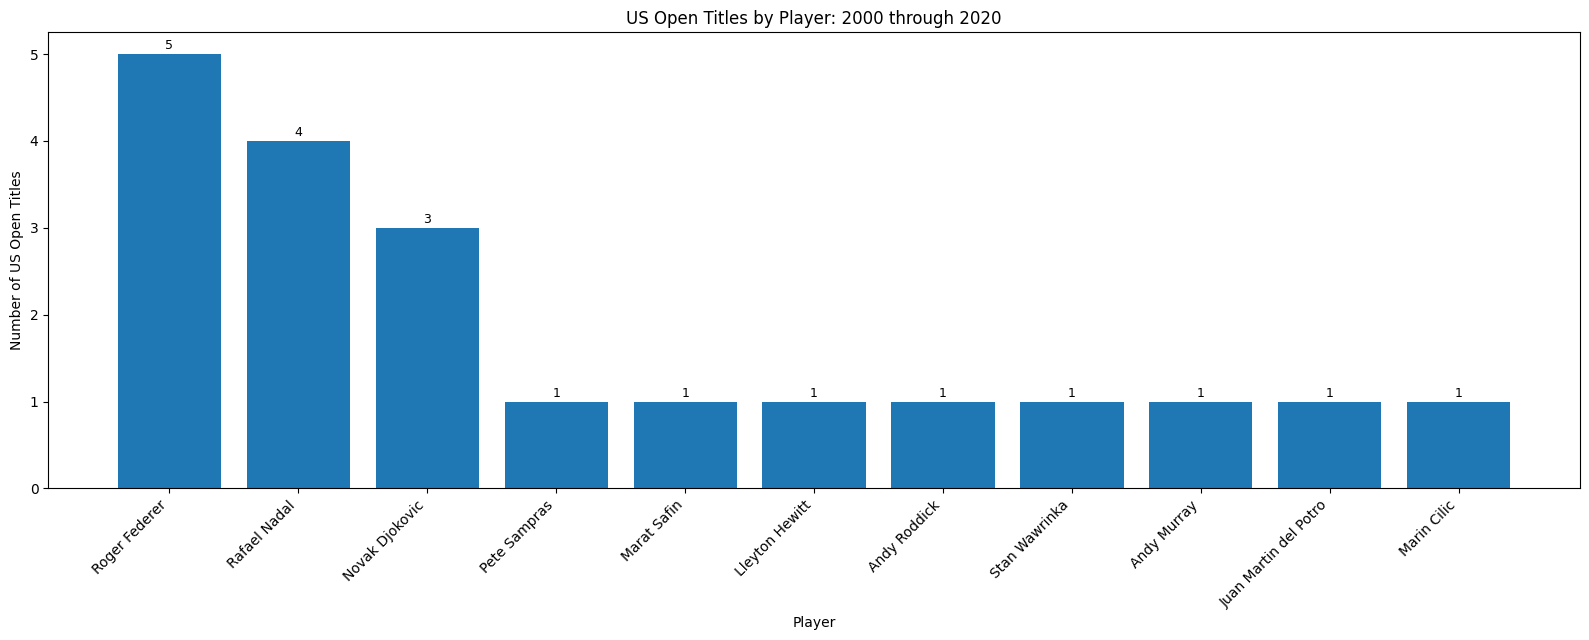

In [32]:
# Plot the bar chart for US Open titles by player

plt.figure(figsize=(16, 6.5))
bars = plt.bar(uso_wins_df.index, uso_wins_df.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.02,
        int(yval),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('US Open Titles by Player: 2000 through 2020')
plt.xlabel('Player')
plt.ylabel('Number of US Open Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [33]:
# Group data to prepare for making a bar chart for title wins by players at the US Open tournament

aus_wins_by_id = aus_open.groupby(['winner_id']).size()
aus_wins_by_id

winner_id
101736    3
102563    1
103498    1
103819    6
104527    1
104745    1
104925    8
dtype: int64

In [34]:
# Apply the mapping from earlier to replace winner_id with names for readability

aus_wins_df = aus_wins_by_id.rename(index=player_mapping)
aus_wins_df

winner_id
Andre Agassi        3
Thomas Johansson    1
Marat Safin         1
Roger Federer       6
Stan Wawrinka       1
Rafael Nadal        1
Novak Djokovic      8
dtype: int64

In [35]:
# Sort the grouped data in the rg_wins_df dataframe in descending order to prepare for bar chart

aus_wins_df = aus_wins_df.sort_values(ascending=False)
aus_wins_df

winner_id
Novak Djokovic      8
Roger Federer       6
Andre Agassi        3
Thomas Johansson    1
Marat Safin         1
Stan Wawrinka       1
Rafael Nadal        1
dtype: int64

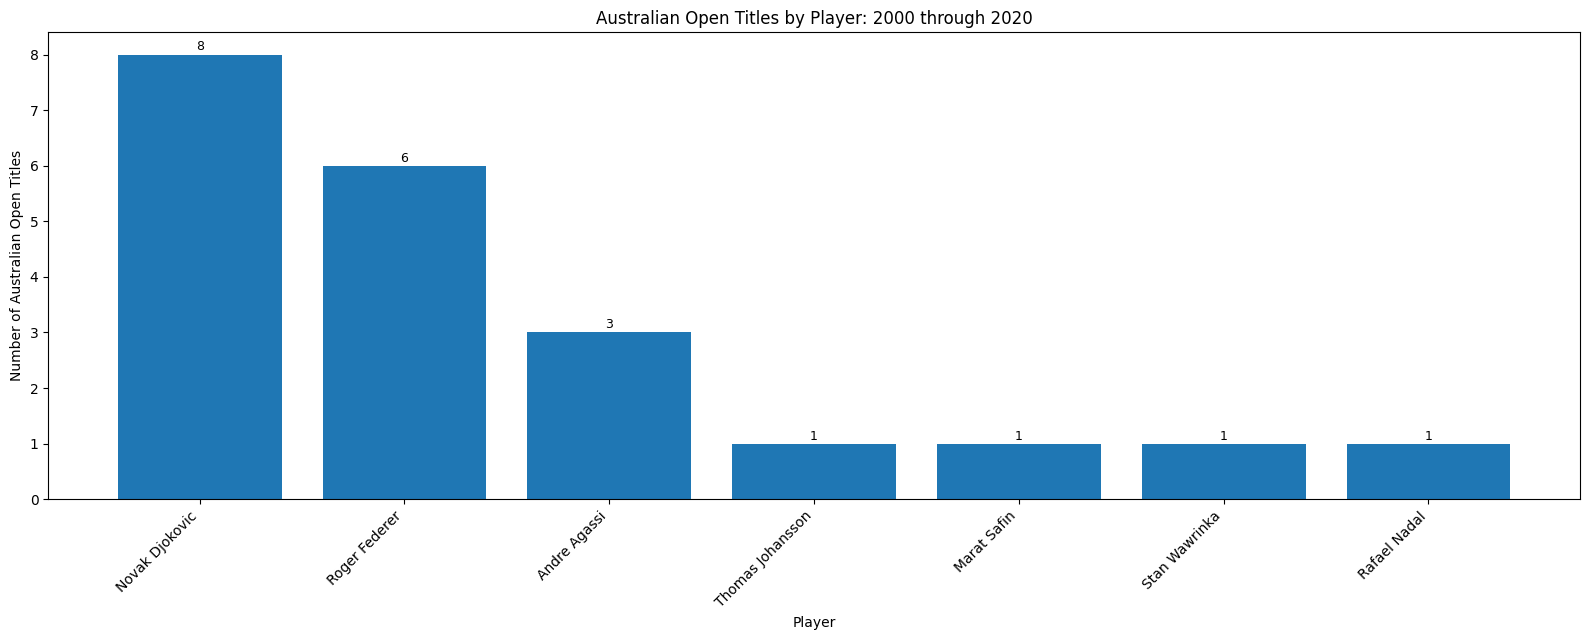

In [36]:
# Plot the bar chart for Australian Open titles by player

plt.figure(figsize=(16, 6.5))
bars = plt.bar(aus_wins_df.index, aus_wins_df.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.02,
        int(yval),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Australian Open Titles by Player: 2000 through 2020')
plt.xlabel('Player')
plt.ylabel('Number of Australian Open Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

**From the charts above, we can see that it was really 3 players that dominated the grand slam tournaments from 2000 through 2020. Rafael Nadal was extremely dominant at Roland Garros, but was less dominant at the other 3 grand slams, the next most wins for him was at the US Open with 4 titles. Roger Federer was equally dominant at the US Open, Australian Open, and Wimbledon, but only managed to get 1 Roland Garros title. His most successful tournament was Wimbledon with 8 titles. Novak Djokovic was similar to Roger Federer in that he ws equally dominant at the US, Australian, and Wimbledon slams, while only managing 2 Roland Garros titles in this timeframe. His most successful tournament was the Australian Open with 8 titles.**

**Next let's take the 3 most dominant players and see how their total grand slam title count changed over the 2000 - 2020 timespan**

In [37]:
# Create a new dataframe that is filtered with only Roger Federer, Rafael Nadal, and Novak Djokovic in the winner_name column

top_three = ['Rafael Nadal', 'Roger Federer', 'Novak Djokovic']
top_three_df = win_counts_df[win_counts_df['winner_name'].isin(top_three)].copy()
top_three_df.head()

,tourney_id_name,tourney_name,winner_name,winner_id
0,2011-520 Roland Garros,Roland Garros,Rafael Nadal,104745
1,2011-540 Wimbledon,Wimbledon,Novak Djokovic,104925
2,2005-560 US Open,US Open,Roger Federer,103819
4,2014-520 Roland Garros,Roland Garros,Rafael Nadal,104745
5,2018-580 Australian Open,Australian Open,Roger Federer,103819


In [38]:
# Create a 'year' column using the year value under 'tourney_id_name' that we will need to create a cumulative chart

top_three_df['year'] = top_three_df['tourney_id_name'].str.extract(r'(^\d{4})').astype(int)
top_three_df.head()

,tourney_id_name,tourney_name,winner_name,winner_id,year
0,2011-520 Roland Garros,Roland Garros,Rafael Nadal,104745,2011
1,2011-540 Wimbledon,Wimbledon,Novak Djokovic,104925,2011
2,2005-560 US Open,US Open,Roger Federer,103819,2005
4,2014-520 Roland Garros,Roland Garros,Rafael Nadal,104745,2014
5,2018-580 Australian Open,Australian Open,Roger Federer,103819,2018


In [39]:
# Calculate the number of wins by year for each player

yearly_wins = top_three_df.groupby(['winner_name', 'year']).size().reset_index(name='wins')
yearly_wins.head()

,winner_name,year,wins
0,Novak Djokovic,2008,1
1,Novak Djokovic,2011,3
2,Novak Djokovic,2012,1
3,Novak Djokovic,2013,1
4,Novak Djokovic,2014,1


In [40]:
all_years = pd.Series(range(top_three_df['year'].min(), top_three_df['year'].max() + 1), name='year')
all_players = yearly_wins['winner_name'].unique()

In [41]:
full_index = pd.MultiIndex.from_product([all_players, all_years], names=['winner_name', 'year'])
yearly_wins_full = yearly_wins.set_index(['winner_name', 'year']).reindex(full_index, fill_value=0).reset_index()

In [42]:
# Calculate cumulative wins

yearly_wins_full['cumulative_wins'] = yearly_wins_full.groupby('winner_name')['wins'].cumsum()

In [45]:
# Pivoting yearly_wins_full dataframe to make an area chart

pivot_df = yearly_wins_full.pivot(index='year', columns='winner_name', values='cumulative_wins')

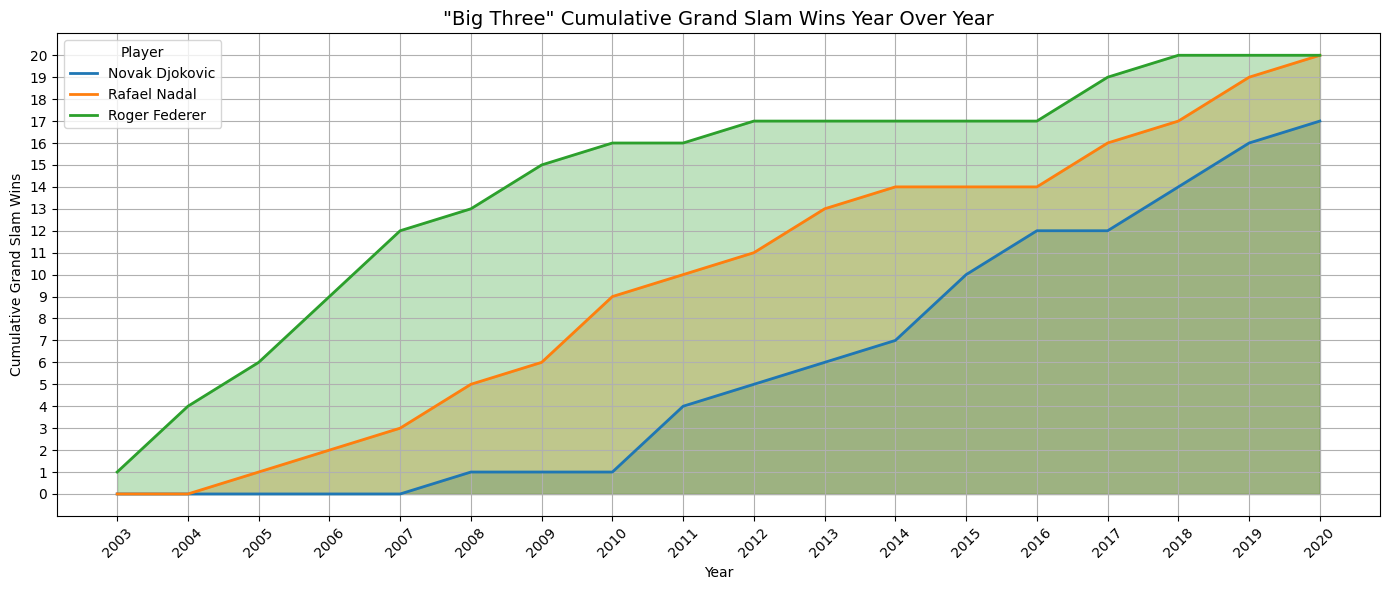

In [46]:
# Create area chart with the same data as a different visual

players = pivot_df.columns
colors = plt.cm.tab10.colors
color_map = {player: colors[i % len(colors)] for i, player in enumerate(players)}

fig, ax = plt.subplots(figsize=(14, 6))

for player in players:
    ax.fill_between(
        pivot_df.index,
        pivot_df[player],
        0,
        alpha=0.3,
        color=color_map[player]
    )
    ax.plot(
        pivot_df.index,
        pivot_df[player],
        label=player,
        color=color_map[player],
        linewidth=2
    )

ax.set_title('"Big Three" Cumulative Grand Slam Wins Year Over Year', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('Cumulative Grand Slam Wins')
ax.grid(True)

ax.set_xticks(all_years)
ax.set_xticklabels(all_years.astype(int), rotation=45)

y_max = int(yearly_wins_full['cumulative_wins'].max())
ax.set_yticks(range(0, y_max + 1))

ax.legend(title='Player')

plt.tight_layout()
plt.show()